## 5.3 超参数与模型验证
<br>

### 主要内容：
>5.3.1. 模型验证：留出集、交叉验证、留一法<br>
5.3.2. 选择最优模型：偏差与方差的均衡、验证曲线<br>
5.3.3. 学习曲线<br>
5.3.4. 网格搜索

<br>

### 5.3.1 模型验证
> 模型验证(model validation) 就是在选择模型和超参数之后，通过对训练数据进行学习,<br>
对比模型对已知数据的**预测值**与**实际值**的差异.<br>介绍如何使用**留出集(holdout set)**和**交叉验证(cross-validation)**及**留一法(LeaveOutOne)**
进行模型验证。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import load_iris
iris = load_iris()
X= iris.data
y = iris.target

#### 1.错误的模型验证方法
> 这里使用一个K近邻分类器，超参数为n_neighbors=1(新数据的标签与其最接近的寻来你数据的标签相同)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
y_model = model.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y,y_model)

1.0

>上面的验证方法是错的，因为它用**同一套数据训练和评估模型**。而且最近邻模型是一种与**距离相关**的评估器，<br>只会简单地存储训练数据，然后把新数据与存储的已知数据进行对比来预测标签。在理想情况下，模型的准确率总是100%

#### 2.留出集
> 从训练模型的数据中留出一部分，然后用这部分留出来的数据检验模型性能

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.5)
model.fit(X_train,y_train)
y_model = model.predict(X_test)
accuracy_score(y_model,y_test)

0.9066666666666666

#### 3.交叉验证
> 用留出集进行模型验证有个缺点，就是模型失去了一部分训练机会。在上面的模型中，有一半数据都没有为模型训练做出贡献。<br>尤其是在训练集规模较小的时候还会出现问题。
解决办法就是用交叉验证，即做一组拟合，让数据的每个子集既是训练集，又是验证集。

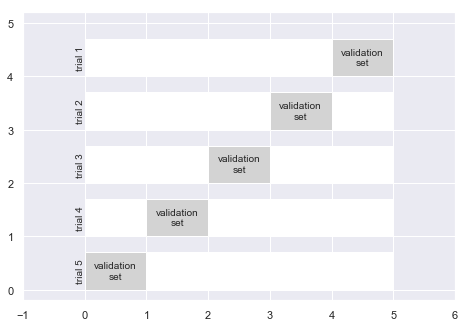

In [7]:
#一个五轮交叉验证例子
def draw_rects(N, ax, textprop={}):
    for i in range(N):
        ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white'))
        ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightgray'))
        ax.text(5. * (i + 0.5) / N, i + 0.35,
                "validation\nset", ha='center', va='center', **textprop)
        ax.text(0, i + 0.35, "trial {0}".format(N - i),
                ha='right', va='center', rotation=90, **textprop)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-0.2, N + 0.2)
    
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('on')
draw_rects(5, ax, textprop=dict(size=10))

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

#### 4.留一法
> 在交叉检验的轮数和样本数相同的极端情况，即**每次只有一个样本做测试，其他样本用于训练**。<br>
计算所有实验准确率的均值即能得到模型的预测准确率

In [15]:
scores = cross_val_score(model,X,y,cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
print('准确率:%.3f'%(scores.mean()))

准确率:0.960


---
### 5.3.2 选择最优模型<br>
#### 模型效果不好时改善方法
 * 用更复杂/更灵活的模型.
 * 用更简单/更确定的模型.
 * 采集更多的训练样本.
 * 为每个样本采集更多的特征. 

### 1.偏差与方差的均衡
* **欠拟合(Underfitting)**：模型没有足够的灵活性来适应数据的所有特征，或者说模型具有**高偏差**.
* **过拟合(Overfitting)**：模型过于灵活，在适应数据所有特征的同时也适应了随机误差，或者说模型具有**高方差**.
* **偏差(Bias)**：反映的是模型在**样本上的输出与真实值之间的误差**，即模型本身的精准度
* **方差(Variance)**：反映的是模型**每一次输出结果与模型输出期望之间的误差**，即模型的稳定性

Text(0.5, 1.0, 'High-variance model: Overfits the data')

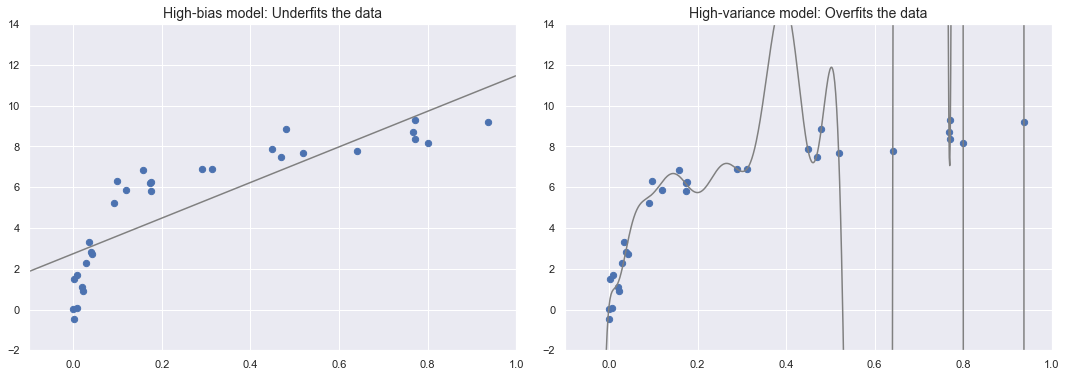

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

#生成数据
def make_data(N=30, err=0.8, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

#多项式回归
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
#欠拟合，高偏差
ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
#过拟合，高方差
ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)


##### 查看模型预测效果

Text(0.02, 0.91, 'validation score: $R^2$ = -1.8e+09')

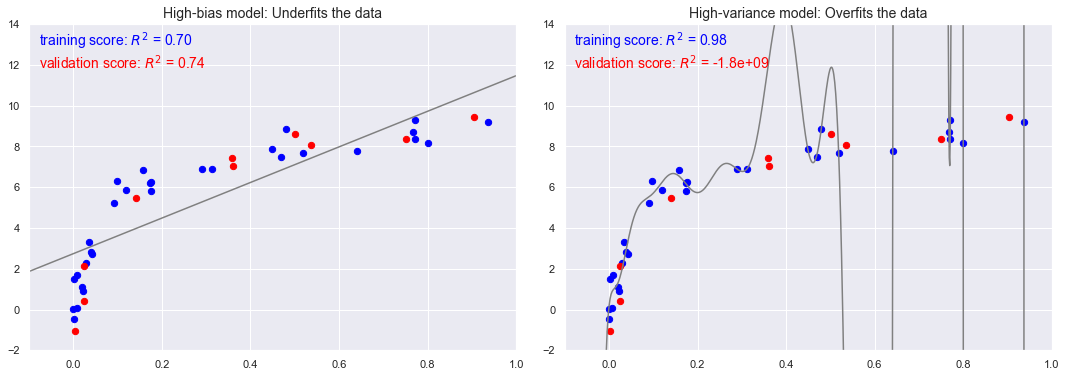

In [20]:
#查看模型预测效果
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X2, y2 = make_data(10, rseed=42)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red')

>* 对于高偏差模型，模型在验证集的表现与在训练集的表现类似
* 对于高方差模型，模型在验证集的表现远远不如在训练集的表现
* 判定系数($R^2$)：用于衡量模型与目标值均值的对比结果.
  1. $R^2=1$ : 表示模型与数据完全吻合
  2. $R^2=0$ : 表示模型不比简单取均值好
  3. $R^2<0$ : 表示模型性能很差
 


##### 验证曲线

Text(0.5, 1.0, 'Validation Curve Schematic')

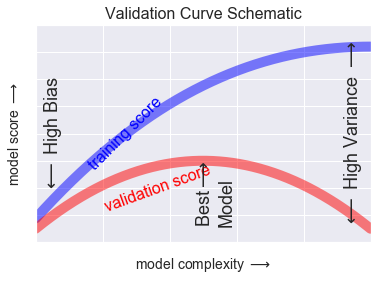

In [21]:
#验证曲线
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

fig, ax = plt.subplots()
ax.plot(x, y2, lw=10, alpha=0.5, color='blue')
ax.plot(x, y1, lw=10, alpha=0.5, color='red')

ax.text(0.15, 0.2, "training score", rotation=45, size=16, color='blue')
ax.text(0.2, -0.05, "validation score", rotation=20, size=16, color='red')

ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=18, rotation=90, va='center')
ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.set_title("Validation Curve Schematic", size=16)

* 训练得分肯定高于验证得分。一般情况下，模型拟合自己接触过的数据比拟合没有接触过的数据效果要好.
* 使用复杂度较低的模型(高偏差)时，训练数据往往欠拟合，说明模型对训练数据和新数据都缺乏预测能力.
* 使用复杂度较高的模型(高方差)时，训练数据往往过拟合，说明模型对训练数据预测能力很强，而对新数据的预测能力很差.
* 使用复杂度适中的模型时，验证曲线得分最高。说明在该模型复杂度条件下，偏差与方差达到均衡状态.

#### Scikit-Learn验证曲线
>用交叉验证计算模型的验证曲线

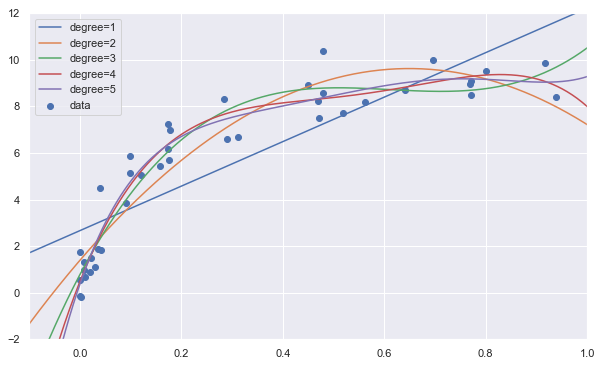

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

def make_data(N,err=1.0,rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1)**2
    y = 10-1./(X.ravel()+0.1)
    if err > 0:
        y += err*rng.randn(N)
    return X,y
X,y = make_data(40)

X_test = np.linspace(-0.1,1.1,500)[:,None]
plt.figure(figsize=(10,6))
plt.scatter(X.ravel(),y,color='b',label='data')
for degree in [1,2,3,4,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label='degree=%d'%degree)
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

(0, 1)

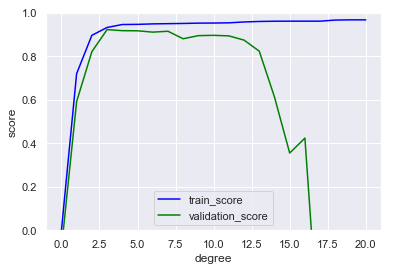

In [47]:
#提供模型，数据，参数名称和验证范围，计算验证范围内的训练得分和验证得分
from sklearn.model_selection import learning_curve,validation_curve
degree = np.arange(0,21)
train_score,val_score = validation_curve(PolynomialRegression(),X,y,
                                         param_name ='polynomialfeatures__degree',param_range=degree,cv=7)

plt.plot(degree,np.median(train_score,axis=1),color='blue',label='train_score')
plt.plot(degree,np.median(val_score,axis=1),color='green',label='validation_score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score')
plt.ylim(0,1)

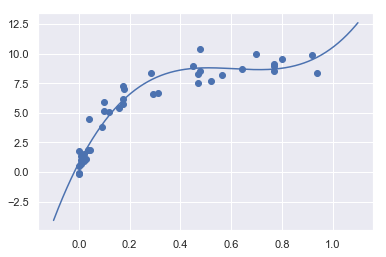

In [48]:
#可知偏差与方差均衡性最好的是三次多项式。可视化三次多项式结果
plt.scatter(X.ravel(),y)
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test,y_test)

### 5.3.3 学习曲线
> 影响模型效果的两个因素：**模型复杂度和训练数据的规模**<br>
**学习曲线**：将模型看成是与训练数据规模相关的函数，通过不断扩大数据集的规模来拟合模型，以此来观察模型的行为。<br>反映训练集规模的训练得分/验证得分曲线

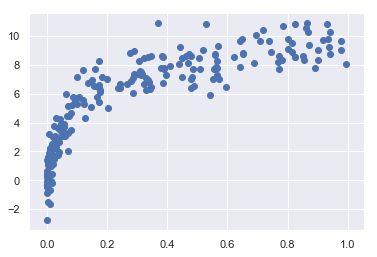

In [49]:
X2,y2 = make_data(200)
plt.scatter(X2,y2)

(0, 1)

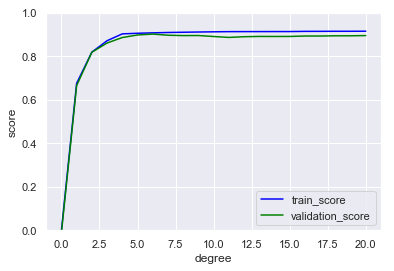

In [50]:
#提供模型，数据，参数名称和验证范围，计算验证范围内的训练得分和验证得分
from sklearn.model_selection import learning_curve,validation_curve
degree = np.arange(0,21)
train_score,val_score = validation_curve(PolynomialRegression(),X2,y2,
                                         param_name ='polynomialfeatures__degree',param_range=degree,cv=7)

plt.plot(degree,np.median(train_score,axis=1),color='blue',label='train_score')
plt.plot(degree,np.median(val_score,axis=1),color='green',label='validation_score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score')
plt.ylim(0,1)

##### 学习曲线的特征
* 特定复杂度的模型对较小的数据集容易过拟合，此时训练得分较高，验证得分较低.
* 特定复杂度的模型对较大的数据集容易欠拟合，随着数据量的增大，训练得分会不断降低，而验证得分会不断升高.
* 模型的验证集得分永远不会高于训练集得分，两条曲线一直在靠近，但永远不会交叉.<br>
注：随着训练样本数量的增加，分数会收敛到定值。因此一旦数据量已经使模型得分收敛，<br>增加训练样本也无济于事，改善模型性能只能换成更复杂的模型

Text(0.5, 1.0, 'Learning Curve Schematic')

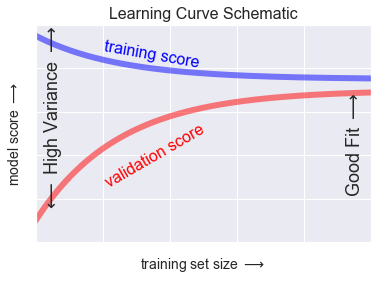

In [52]:
N = np.linspace(0, 1, 1000)
y1 = 0.75 + 0.2 * np.exp(-4 * N)
y2 = 0.7 - 0.6 * np.exp(-4 * N)

fig, ax = plt.subplots()
ax.plot(x, y1, lw=6, alpha=0.5, color='blue')
ax.plot(x, y2, lw=6, alpha=0.5, color='red')

ax.text(0.2, 0.88, "training score", rotation=-10, size=16, color='blue')
ax.text(0.2, 0.5, "validation score", rotation=30, size=16, color='red')

ax.text(0.98, 0.45, r'Good Fit $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel(r'training set size $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Learning Curve Schematic", size=16)

#### Scikit-Learn学习曲线

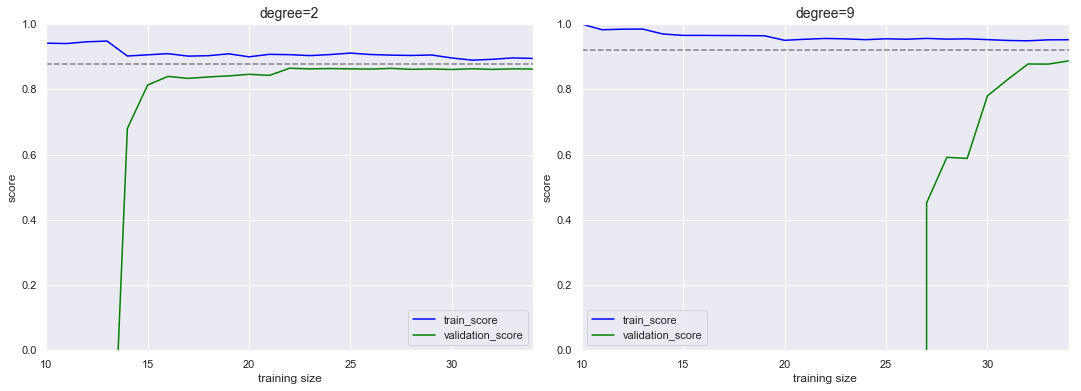

In [57]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for i,degree in enumerate([2,9]):
    N,train_lc,val_lc = learning_curve(PolynomialRegression(degree),
                                       X,y,cv=7,train_sizes=np.linspace(0.3,1,25))
    ax[i].plot(N,np.mean(train_lc,axis=1),color='blue',label='train_score')
    ax[i].plot(N,np.mean(val_lc,axis=1),color='green',label='validation_score')
    ax[i].hlines(np.mean([train_lc[-1],val_lc[-1]]),N[0],N[-1],color='gray',linestyle='dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0],N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree=%d'%degree,size=14)
    ax[i].legend(loc='best')
    

---
### 5.3.4 验证实践：网格搜索
> 用网格搜索寻找最优多项式回归模型

In [58]:
from sklearn.model_selection import GridSearchCV
#在模型特征的三维网格中寻找最优值--包括多项式次数的搜索范围、回归模型是否拟合截距、
#以及回归模型是否需要进行标准化处理
param_grid = {'polynomialfeatures__degree':np.arange(21),
              'linearregression__fit_intercept':[True,True],
              'linearregression__normalize':[True,False]}
grid = GridSearchCV(PolynomialRegression(),param_grid,cv=7)
grid.fit(X,y)
#获取最优参数
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

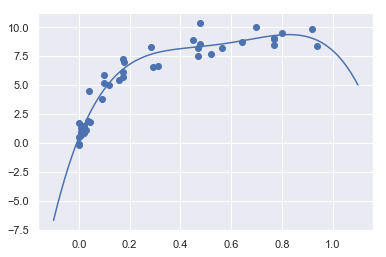

In [62]:
#用最优参数的模型拟合数据
model = grid.best_estimator_
plt.scatter(X.ravel(),y)
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
